Q1: (A) Please write a Python code to read all postal codes and save them in a list.

In [65]:
import pandas as pd

df1 = pd.read_csv ('postalcode.txt', 
                         names=['City', 'Code'])
print (df1)


                      City   Code
0                 Bordeaux  33000
1       Ambares-et-Lagrave  33440
2                    Ambes  33810
3   Artigues-pres-Bordeaux  33370
4                 Brassens  33530
5                   Begles  33130
6              Blanquefort  33290
7                   Bruges  33520
8             Carbon-Blanc  33560
9                    Cenon  33150
10                 Eysines  33320
11                 Floriac  33270
12               Gradignan  33170
13              Le Bouscat  33110
14              Le Haillan  33185
15                 Lormont  33310
16     Martignas-sur-Jalle  33127
17                Merignac  33700
18                  Pessac  33600
19    Saint-Aubin-de-Medoc  33160
20                 Talence  33400
21                   Ornon  33140


In [66]:
df1.columns

Index(['City', 'Code'], dtype='object')

In [67]:
list_code= df1.loc[0:22, 'Code']
postal_code = list(list_code)
print(postal_code)

[33000, 33440, 33810, 33370, 33530, 33130, 33290, 33520, 33560, 33150, 33320, 33270, 33170, 33110, 33185, 33310, 33127, 33700, 33600, 33160, 33400, 33140]


Q1: (B) Continue with (A). Please export descriptive statistics of price and size of apartments
(i.e., mean, std, min, max, median, Q25, Q75) for every postal code (that you read in A) as a csv 
file (e.g., 33110.csv, 33440.csv and so on) in Bordeaux Metropole.

In [68]:
import pandas as pd
import numpy as np

df2 = pd.read_csv ('Bordeaux_Metropole.csv')
df2

,date_mutation,valeur_fonciere,code_postal,section,type_local,surface_relle_bati,nombre_pieces_principales,surface_terrain
0,2014/2/6,155000.0,33000,KX,Appartement,32,2,NaN
1,2014/6/11,286000.0,33000,LY,Maison,105,4,132.0
2,2014/10/31,200000.0,33000,HW,Maison,30,1,NaN
3,2014/10/31,200000.0,33000,HW,Appartement,32,2,NaN
4,2014/10/31,200000.0,33000,HW,Appartement,28,2,NaN
...,...,...,...,...,...,...,...,...
76432,2017/2/14,155000.0,33140,AB,Appartement,74,3,NaN
76433,2017/11/22,185000.0,33140,AL,Maison,66,4,803.0
76434,2019/5/15,560000.0,33140,AH,Maison,137,4,540.0
76435,2016/2/29,209400.0,33140,CL,Maison,65,3,205.0


In [69]:
b1 = []
for i in range(len(postal_code)):
    df =  df2[(df2.code_postal == postal_code[i])& (df2['type_local'] == 'Appartement')]
    b1.append(df)

In [70]:
for i in range(0, len(postal_code)):
    v = b1[i].describe().loc[:,['valeur_fonciere','surface_relle_bati']]
    v.to_csv(f'{postal_code[i]}.csv')

Q2: (A) For long strategy, we choose simple-moving average (SMA) pairs (i.e., 5-day SMA and 
10-day SMA) to analyze the trend in the stock market. Please compute 5-day SMA and 10-day 
SMA of the close price sequence, plot, and labels 5-day SMA and 10-day SMA with blue and red 
solid curves, respectively. Please attach the figure in the report.


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [72]:
df3 = pd.read_excel ('TSLA_2017_2020.xlsx')

In [73]:
df3.head()

,Date,ticker,High,Low,Open,Close,Volume,Adj Close
0,2017-01-03,TSLA,44.066002,42.192001,42.972000,43.397999,29616500,43.397999
1,2017-01-04,TSLA,45.599998,42.862000,42.950001,45.397999,56067500,45.397999
2,2017-01-05,TSLA,45.495998,44.389999,45.284000,45.349998,29558500,45.349998
3,2017-01-06,TSLA,46.062000,45.090000,45.386002,45.801998,27639500,45.801998
4,2017-01-09,TSLA,46.383999,45.599998,45.793999,46.256001,19897500,46.256001


In [74]:
short = 5
long = 10

df3['Close_short'] = df3['Close'].rolling(window=short).mean()
df3['Close_long'] = df3['Close'].rolling(window=long).mean()

df3

,Date,ticker,High,Low,Open,Close,Volume,Adj Close,Close_short,Close_long
0,2017-01-03,TSLA,44.066002,42.192001,42.972000,43.397999,29616500,43.397999,NaN,NaN
1,2017-01-04,TSLA,45.599998,42.862000,42.950001,45.397999,56067500,45.397999,NaN,NaN
2,2017-01-05,TSLA,45.495998,44.389999,45.284000,45.349998,29558500,45.349998,NaN,NaN
3,2017-01-06,TSLA,46.062000,45.090000,45.386002,45.801998,27639500,45.801998,NaN,NaN
4,2017-01-09,TSLA,46.383999,45.599998,45.793999,46.256001,19897500,46.256001,45.240799,NaN
...,...,...,...,...,...,...,...,...,...,...
749,2019-12-24,TSLA,85.094002,82.538002,83.671997,85.050003,40273500,85.050003,81.889999,77.5702
750,2019-12-26,TSLA,86.695999,85.269997,85.582001,86.188004,53169500,86.188004,83.401601,79.1350
751,2019-12-27,TSLA,87.061996,85.222000,87.000000,86.075996,49728500,86.075996,84.455200,80.5490
752,2019-12-30,TSLA,85.800003,81.851997,85.758003,82.940002,62932000,82.940002,84.819601,81.6752


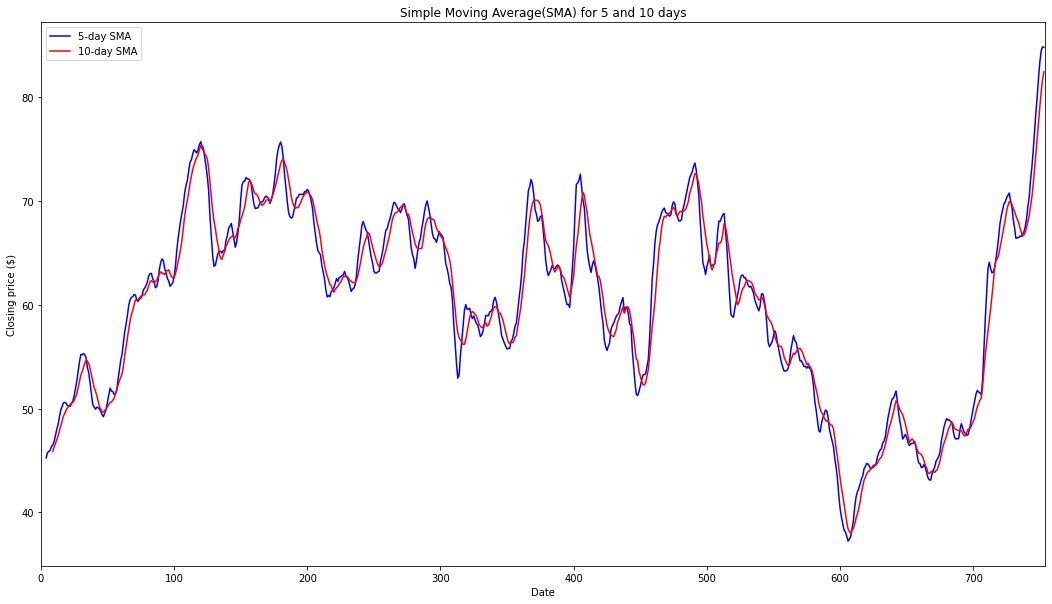

In [75]:
fig, ax = plt.subplots (figsize=(18,10))


ax.plot (df3.index, df3['Close_short'], label = '5-day SMA', color = 'blue')
ax.plot (df3.index, df3['Close_long'],  label = '10-day SMA',color = 'r')


ax.set_xlabel ('Date')
ax.set_ylabel ('Closing price ($)')
plt.title('Simple Moving Average(SMA) for 5 and 10 days')
ax.set_xlim ([0, df3.shape[0]])
ax.legend ()
plt.show()

Q2:  (B) If golden cross (i.e., the buying signal) occurs when 5-day SMA crosses over 10-day 
SMA and the death cross (i.e., the selling signal) occurs when 10-day SMA crosses over 5-day 
SMA. Please write a python code to simulate the revenue of this trading strategy given your trade 
is executed at the next day’s open price. Please report the total number of transactions and your 
average revenue that you have traded to Q3_b.xlsx.


In [76]:
def LongPosition_transaction(seq):
    status = 0
    PriceBuy = []
    PriceSell = []
    Revenue = []
    Temp_buyprice = -1
    for i in range(len(seq)):
        if seq['Close_short'][i] > seq['Close_long'][i]:
            # Signal to buy
            if status != 1:
                status = 1
                PriceBuy.append(seq['Open'][i+1])
                PriceSell.append(np.nan)
                Temp_buyprice = seq['Open'][i+1]
                Revenue.append(np.nan)
            else:
                PriceBuy.append(np.nan)
                PriceSell.append(np.nan)
                Revenue.append(np.nan)
        elif seq['Close_short'][i] < seq['Close_long'][i]:
            #singnal to sell
            if status != 0:
                status = 0
                PriceBuy.append(np.nan)
                PriceSell.append(seq['Open'][i+1])
                Revenue.append(seq['Open'][i+1]- Temp_buyprice)
            else:
                PriceBuy.append(np.nan)
                PriceSell.append(np.nan)
                Revenue.append(np.nan)
        else:
            PriceBuy.append(np.nan)
            PriceSell.append(np.nan)
            Revenue.append(np.nan)
    return (PriceBuy, PriceSell, Revenue)

In [77]:
Q3_b = pd.DataFrame((LongPosition_transaction(df3)))
Q3_b = Q3_b.T
Q3_b.columns = ['Buy','Sell','Revenue']
Q3_b.to_excel ('Q3_b.xlsx')

In [78]:
TransactionBuy = Q3_b['Buy'].count()
TransactionSell = Q3_b['Sell'].count()
Total_Transaction= TransactionBuy + TransactionSell
averageRevenue = Q3_b['Revenue'].mean()
print ("Number of Transactions: " + str(Total_Transaction))
print ("Average Revenue " + str(averageRevenue))
Result = [Total_Transaction, averageRevenue]

Number of Transactions: 81
Average Revenue 0.38105001449584835


In [79]:
Q3_b1 = pd.DataFrame(Result)
Q3_b1 = Q3_b1.T
Q3_b1.columns = ['Total Transaction','Average Revenue']
Q3_b1.to_excel('Q3_b1.xlsx')

Q2: (C) Continue with (B) Please visualize the strategy over 3 years in a graph, where the black 
solid line is used for the open price sequence with a blue pentagon for golden cross (buy) and red 
pentagon for death cross (sell), respectively. Please attach the figure in the report.

Text(0.5, 1.0, 'Strategy')

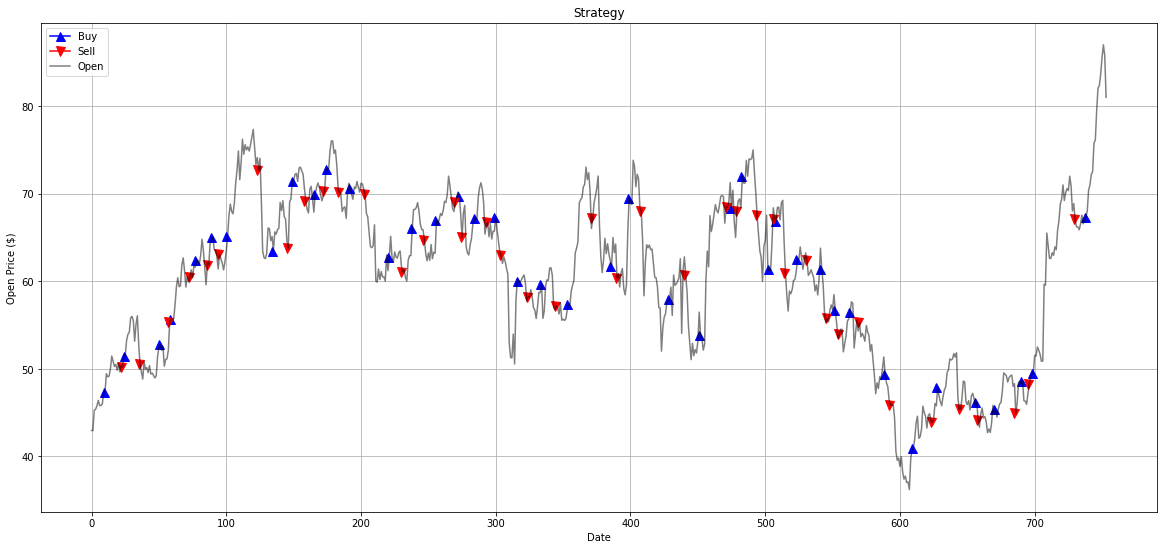

In [80]:
df4 = Q3_b
df4.columns = ['Buy Price', 'Sell Price', 'Revenue']

fig = plt.figure(figsize =(20,9))
plt.plot(df4.index, df4['Buy Price'], color = 'blue', label = 'Buy', marker = '^', markersize = 9)
plt.plot(df4.index, df4['Sell Price'], color = 'red', label = 'Sell', marker = 'v', markersize = 9)
plt.plot(df4.index,df3['Open'], color = 'k', label='Open', alpha = 0.5)
plt.legend (loc='upper left')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Open Price ($)')
plt.title('Strategy')

Q2: (D) Compare the simple-moving average (SMA) pairs you worked in (B), i.e., 5-day SMA 
and 10-day SMA with another simple-moving average (SMA) pairs of 5-day SMA and 20-day 
SMA. Please indicate which one is the better strategy in average revenue. Please provide the 
evidence in your report for these two trading pairs.

In [81]:
df5 = pd.read_excel ('TSLA_2017_2020.xlsx')
short = 5
long = 20

df5['Close_short'] = df5['Close'].rolling(window = short).mean()
df5['Close_long'] = df5['Close'].rolling(window = long).mean()

df5

,Date,ticker,High,Low,Open,Close,Volume,Adj Close,Close_short,Close_long
0,2017-01-03,TSLA,44.066002,42.192001,42.972000,43.397999,29616500,43.397999,NaN,NaN
1,2017-01-04,TSLA,45.599998,42.862000,42.950001,45.397999,56067500,45.397999,NaN,NaN
2,2017-01-05,TSLA,45.495998,44.389999,45.284000,45.349998,29558500,45.349998,NaN,NaN
3,2017-01-06,TSLA,46.062000,45.090000,45.386002,45.801998,27639500,45.801998,NaN,NaN
4,2017-01-09,TSLA,46.383999,45.599998,45.793999,46.256001,19897500,46.256001,45.240799,NaN
...,...,...,...,...,...,...,...,...,...,...
749,2019-12-24,TSLA,85.094002,82.538002,83.671997,85.050003,40273500,85.050003,81.889999,72.273899
750,2019-12-26,TSLA,86.695999,85.269997,85.582001,86.188004,53169500,86.188004,83.401601,73.294100
751,2019-12-27,TSLA,87.061996,85.222000,87.000000,86.075996,49728500,86.075996,84.455200,74.284999
752,2019-12-30,TSLA,85.800003,81.851997,85.758003,82.940002,62932000,82.940002,84.819601,75.132600


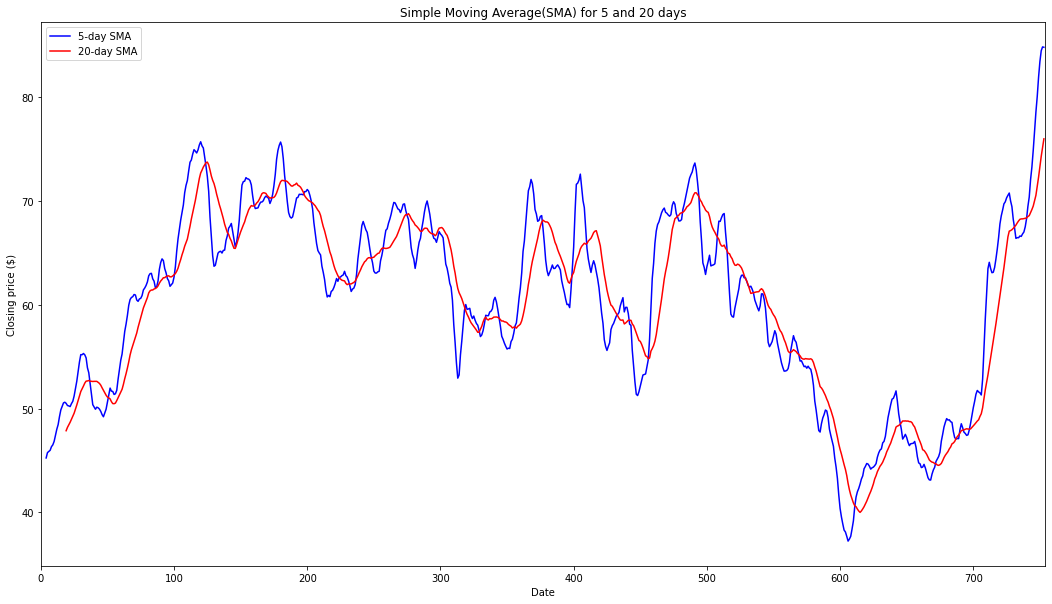

In [82]:
fig, ax = plt.subplots (figsize=(18,10))


ax.plot (df5.index, df5['Close_short'], label = '5-day SMA', color = 'blue')
ax.plot (df5.index, df5['Close_long'],  label = '20-day SMA',color = 'r')


ax.set_xlabel ('Date')
ax.set_ylabel ('Closing price ($)')
plt.title('Simple Moving Average(SMA) for 5 and 20 days')
ax.set_xlim ([0, df5.shape[0]])
ax.legend ()
plt.show()

In [83]:
def LongPosition_transaction2(seq):
    Status2 = 0
    PriceBuy2 = []
    PriceSell2 = []
    Revenue2 = []
    Temp_buyprice2 = -1
    for i in range(len(seq)):
        if seq['Close_short'][i] > seq['Close_long'][i]:
            # Signal to buy
            if Status2 != 1:
                Status2 = 1
                PriceBuy2.append(seq['Open'][i+1])
                PriceSell2.append(np.nan)
                Temp_buyprice2 = seq['Open'][i+1]
                Revenue2.append(np.nan)
            else:
                PriceBuy2.append(np.nan)
                PriceSell2.append(np.nan)
                Revenue2.append(np.nan)
        elif seq['Close_short'][i] < seq['Close_long'][i]:
            #singnal to sell
            if Status2 != 0:
                Status2 = 0
                PriceBuy2.append(np.nan)
                PriceSell2.append(seq['Open'][i+1])
                Revenue2.append(seq['Open'][i+1]- Temp_buyprice2)
            else:
                PriceBuy2.append(np.nan)
                PriceSell2.append(np.nan)
                Revenue2.append(np.nan)
        else:
            PriceBuy2.append(np.nan)
            PriceSell2.append(np.nan)
            Revenue2.append(np.nan)
    return (PriceBuy2, PriceSell2, Revenue2)

In [84]:
Q3_b2 = pd.DataFrame(LongPosition_transaction2(df5))
Q3_b2 = Q3_b2.T
Q3_b2.to_excel('Q3_b2.xlsx')

In [85]:
df6 = pd.read_excel ('Q3_b.xlsx', 
                         names=['Sell', 'Price','Revenue'])

list_revenue1= df6.loc[0:753, 'Revenue']
revenue1 = list(list_revenue1)


In [86]:
df7 = pd.read_excel ('Q3_b2.xlsx', 
                         names=['Sell', 'Price','Revenue'])

list_revenue2= df7.loc[0:753, 'Revenue']
revenue2 = list(list_revenue2)


In [87]:
revenue_lista10 = np.nansum(revenue1)
revenue_lista20 = np.nansum(revenue2)
print("revenue lista10:" + str(revenue_lista10))
print("revenue lista20:" + str (revenue_lista20))

revenue lista10:15.242000579833938
revenue lista20:-6.942008972167969


In [88]:
if revenue_lista10 > revenue_lista20:
    print("After comparing the SMA stratgies, we can concluded that the SMA 5-10 is the better strategy in average revenue ")
else:
    print("After comparing the SMA strategies, we can concluded that the SMA 5-20 is the better strategy in average revenue ")

After comparing the SMA stratgies, we can concluded that the SMA 5-10 is the better strategy in average revenue 


Q2: (E) Continue with (B) Write a python to close your position at the end of the trading period, 
that is, sell all your stocks at the best price for closing your position. Please export your 
accumulated revenue to Q3_e.xlsx

In other file